<a href="https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%206%20-%20Lesson%203%20-%20Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2019 The TensorFlow Authors.

In [1]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
import os

from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications.inception_v3 import InceptionV3


## Creating the Neural Network Model

In [3]:

local_weights_file = 'C:\gits_folders\Tensorflow_Lite_embeded\generic_transfer learning\inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
  layer.trainable = False
  
# pre_trained_model.summary()

last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [4]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [5]:
last_output

<tf.Tensor 'mixed7/Identity:0' shape=(None, 7, 7, 768) dtype=float32>

In [6]:


# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(100, activation='relu')(x)
# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense(3, activation='softmax')(x)           

    
model = Model( pre_trained_model.input, x) 


model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [8]:

TRAINING_DIR = "C:\\gits_folders\\Tensorflow_Lite_embeded\\raspbery\\enzo_01\\data"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = training_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size = 10,
                                                    class_mode='categorical', 
                                                    target_size = (150, 150)) 


VALIDATION_DIR = "C:\\gits_folders\\Tensorflow_Lite_embeded\\raspbery\\enzo_01\\data"
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical',
  batch_size=10
)


Found 191 images belonging to 3 classes.
Found 191 images belonging to 3 classes.


In [14]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 10,
            epochs = 5,
            validation_steps = 5,
            verbose = 2)

Train for 10 steps, validate for 5 steps
Epoch 1/5
10/10 - 36s - loss: 0.4041 - accuracy: 0.8800 - val_loss: 0.1472 - val_accuracy: 0.9400
Epoch 2/5
10/10 - 36s - loss: 0.2144 - accuracy: 0.9121 - val_loss: 2.1092e-04 - val_accuracy: 1.0000
Epoch 3/5
10/10 - 35s - loss: 0.7517 - accuracy: 0.9341 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 4/5
10/10 - 36s - loss: 0.1816 - accuracy: 0.9341 - val_loss: 0.0369 - val_accuracy: 0.9800
Epoch 5/5
10/10 - 36s - loss: 0.1893 - accuracy: 0.9700 - val_loss: 0.0205 - val_accuracy: 1.0000


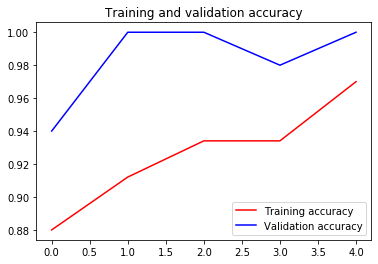

<Figure size 432x288 with 0 Axes>

In [15]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [20]:
import PIL

In [21]:
image_batch, label_batch = next(iter(train_generator))

In [22]:
import numpy as np
import numpy
import os
import PIL
import PIL.Image
import matplotlib.pyplot as plt

C:\Users\enzus\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


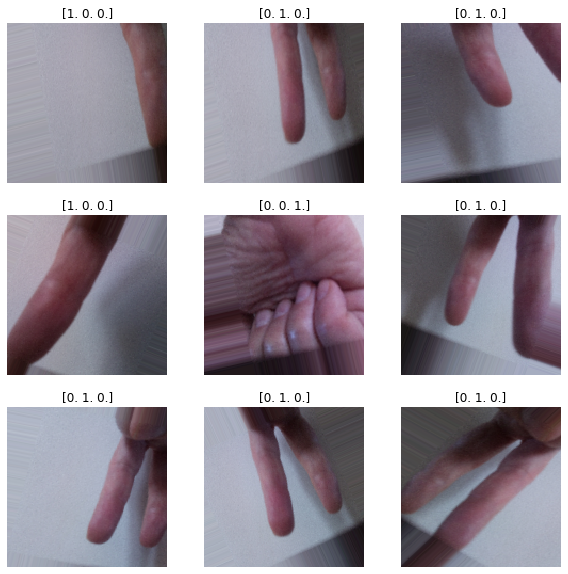

In [19]:
image_batch, label_batch = next(iter(train_generator))
plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i])#.numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(label)
  plt.axis("off")

In [23]:
model.save("C:\\gits_folders\\Tensorflow_Lite_embeded\\raspbery\\enzo_01")


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: C:\gits_folders\Tensorflow_Lite_embeded\raspbery\enzo_01\assets


In [24]:
! dir 

 Volume in drive C is Windows-SSD
 Volume Serial Number is 36BC-8C76

 Directory of C:\gits_folders\Tensorflow_Lite_embeded\raspbery\enzo_01

28/02/2021  18:36    <DIR>          .
28/02/2021  18:36    <DIR>          ..
28/02/2021  18:02    <DIR>          .ipynb_checkpoints
28/02/2021  18:35    <DIR>          assets
28/02/2021  18:03    <DIR>          data
28/02/2021  17:37       827,372,891 data.zip
28/02/2021  18:35           608,975 Enzo01.ipynb
28/02/2021  18:36         4,018,091 saved_model.pb
28/02/2021  18:35    <DIR>          variables
               3 File(s)    831,999,957 bytes
               6 Dir(s)  258,550,915,072 bytes free


### Converting the model

In [25]:
export_dir = "C:\\gits_folders\\Tensorflow_Lite_embeded\\raspbery\\enzo_01"
loaded = tf.saved_model.load(export_dir)

In [26]:
print(list(loaded.signatures.keys()))
infer = loaded.signatures["serving_default"]
print(infer.structured_input_signature)
print(infer.structured_outputs)

['serving_default']
((), {'input_1': TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='input_1')})
{'dense_1': TensorSpec(shape=(None, 3), dtype=tf.float32, name='dense_1')}


In [27]:
converter = tf.lite.TFLiteConverter.from_saved_model(export_dir)

In [28]:
converter.optimizations = [tf.lite.Optimize.DEFAULT]

In [29]:
tflite_model = converter.convert()
tflite_model_file = 'enzo01_converted_model.tflite'

with open(tflite_model_file, "wb") as f:
    f.write(tflite_model)

In [30]:
!dir

 Volume in drive C is Windows-SSD
 Volume Serial Number is 36BC-8C76

 Directory of C:\gits_folders\Tensorflow_Lite_embeded\raspbery\enzo_01

28/02/2021  18:37    <DIR>          .
28/02/2021  18:37    <DIR>          ..
28/02/2021  18:02    <DIR>          .ipynb_checkpoints
28/02/2021  18:35    <DIR>          assets
28/02/2021  18:03    <DIR>          data
28/02/2021  17:37       827,372,891 data.zip
28/02/2021  18:35           608,975 Enzo01.ipynb
28/02/2021  18:37        12,788,304 enzo01_converted_model.tflite
28/02/2021  18:36         4,018,091 saved_model.pb
28/02/2021  18:35    <DIR>          variables
               4 File(s)    844,788,261 bytes
               6 Dir(s)  258,538,082,304 bytes free


### Test sanitario 

In [9]:
# Load TFLite model and allocate tensors.
  
interpreter = tf.lite.Interpreter(model_path=tflite_model_file)
interpreter.allocate_tensors()

input_index = interpreter.get_input_details()[0]["index"]
output_index = interpreter.get_output_details()[0]["index"]

In [19]:
from tqdm import tqdm
predictions = []
#image_batch, label_batch = next(iter(train_generator))
test_labels, test_imgs = [], []
for img, label in tqdm(next(iter(train_generator))): #test_batches.take(10)
    interpreter.set_tensor(input_index, img)
    interpreter.invoke()
    predictions.append(interpreter.get_tensor(output_index))
    
    test_labels.append(label.numpy()[0])
    test_imgs.append(img)

  0%|                                                                                            | 0/2 [00:00<?, ?it/s]


ValueError: too many values to unpack (expected 2)

In [20]:
from tflite_runtime.interpreter import Interpreter
from PIL import Image
import numpy as np
#import argparse


#parser = argparse.ArgumentParser(description='Rock, paper and scissors')
#parser.add_argument('--filename', type=str, help='Specify the filename', required=True)
#parser.add_argument('--model_path', type=str, help='Specify the model path', required=True)

#args = parser.parse_args()

filename = 'C:\\dataset_experimentale\\train\\two\\WIN_20201221_00_18_19_Pro.jpg'
model_path = 'giulio01_converted_model.tflite' 

#labels = ['Cat', 'Dog']

# Load TFLite model and allocate tensors
interpreter = Interpreter(model_path=model_path)
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Read image with Pillow
img = Image.open(filename).convert('RGB')

# Get input size
input_shape = input_details[0]['shape']
size = input_shape[:2] if len(input_shape) == 3 else input_shape[1:3]

# Preprocess image
img = img.resize(size)
img = np.array(img, dtype=np.float32)
img = img / 255.

# Add a batch dimension
input_data = np.expand_dims(img, axis=0)

# Point the data to be used for testing and run the interpreter
interpreter.set_tensor(input_details[0]['index'], input_data)
interpreter.invoke()

# Obtain results and print the predicted category
predictions = interpreter.get_tensor(output_details[0]['index'])
print(predictions)

#predicted_label = np.argmax(predictions)
#print(labels[predicted_label])

ModuleNotFoundError: No module named 'tflite_runtime'

In [21]:
import numpy as np
import tensorflow as tf

# Load the TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='giulio01_converted_model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[7.0029338e-09 9.9999702e-01 3.0244555e-06]]
